<a href="https://colab.research.google.com/github/nitaymayo/Donut_Blink/blob/master/Donut_Blink.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Donut Blink

Welcome to Donut_Blink, AI model based on CNNs methods to alert you when youre eyes are closed

In [ ]:
# because of tf bug in saving models, downgrading to 2.9.1 in necessary

! pip install --upgrade tensorflow==2.9.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 63.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 102.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 KB 46.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 67.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 66.2 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.3.3
    Uninstalling flatbuffers-23.3.3:
      Successfully uninstalled flatbuffers-23.3.3
  Attempting uni

In [ ]:
! nvidia-smi

Sun Apr  2 19:17:37 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Imports

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import os
import random
import matplotlib.patches as patches
import dlib
import cv2
import numpy as np
from matplotlib.patches import Circle
import matplotlib.pyplot as plt
import random
import pandas as pd
import time
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import PIL
import io
import html


In [ ]:
tf.__version__

'2.9.1'

In [ ]:
! wget https://github.com/nitaymayo/my_repo/raw/main/helper_functions.py
from helper_functions import *

--2023-04-02 19:17:46--  https://github.com/nitaymayo/my_repo/raw/main/helper_functions.py
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/nitaymayo/my_repo/main/helper_functions.py [following]
--2023-04-02 19:17:46--  https://raw.githubusercontent.com/nitaymayo/my_repo/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10460 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.21K  --.-KB/s    in 0s      

2023-04-02 19:17:46 (86.6 MB/s) - ‘helper_functions.py’ saved [10460/10460]



## Getting Data

### Eyes detection data

In [ ]:
! wget https://github.com/nitaymayo/Dount_Blink/raw/master/eyes_detection_data.zip

--2023-04-02 19:17:47--  https://github.com/nitaymayo/Dount_Blink/raw/master/eyes_detection_data.zip
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/nitaymayo/Donut_Blink/raw/master/eyes_detection_data.zip [following]
--2023-04-02 19:17:47--  https://github.com/nitaymayo/Donut_Blink/raw/master/eyes_detection_data.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/nitaymayo/Donut_Blink/master/eyes_detection_data.zip [following]
--2023-04-02 19:17:48--  https://raw.githubusercontent.com/nitaymayo/Donut_Blink/master/eyes_detection_data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.19

In [ ]:
unzip_data("/content/eyes_detection_data.zip")

In [ ]:
import glob

files = glob.glob("eyes detection data/full face/*.jpg")
files[:10]

['eyes detection data/full face/9.jpg',
 'eyes detection data/full face/436.jpg',
 'eyes detection data/full face/546.jpg',
 'eyes detection data/full face/1073.jpg',
 'eyes detection data/full face/1879.jpg',
 'eyes detection data/full face/787.jpg',
 'eyes detection data/full face/1989.jpg',
 'eyes detection data/full face/993.jpg',
 'eyes detection data/full face/2588.jpg',
 'eyes detection data/full face/2136.jpg']

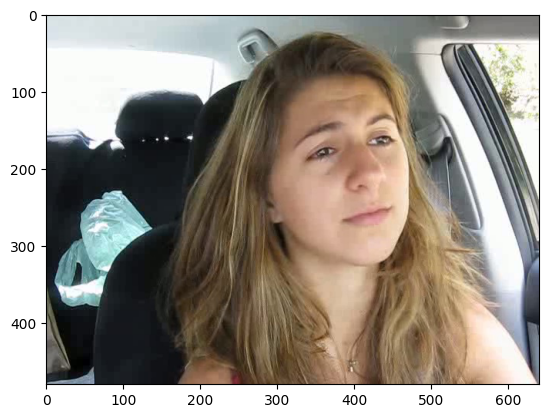

In [ ]:
img = plt.imread(files[10])
plt.imshow(img)

In [ ]:
# Creating data set
IMG_SIZE = (224, 224)
faces_path = "/content/eyes detection data/full face"

faces_dataset = tf.keras.preprocessing.image_dataset_from_directory(faces_path,
                                                                    label_mode=None,
                                                                    image_size=IMG_SIZE,
                                                                    interpolation="nearest")

Found 616 files belonging to 1 classes.


(32, 224, 224, 3)
max value:255
min value:0


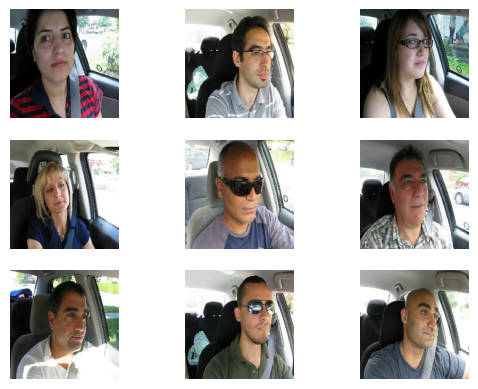

In [ ]:
# Visualizing the images
for faces in faces_dataset.take(1):
  print(faces.shape)
  # faces = faces / 255.
  print(f"max value:{tf.math.reduce_max(faces)}")
  print(f"min value:{tf.math.reduce_min(faces)}")
  for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(faces[i])
    plt.axis(False)

### Eyes state dectection data

In [ ]:
! wget https://github.com/nitaymayo/Donut_Blink/raw/master/eyes_state_detection_data.zip

unzip_data("eyes_state_detection_data.zip")

--2023-04-02 19:17:56--  https://github.com/nitaymayo/Donut_Blink/raw/master/eyes_state_detection_data.zip
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/nitaymayo/Donut_Blink/master/eyes_state_detection_data.zip [following]
--2023-04-02 19:17:56--  https://raw.githubusercontent.com/nitaymayo/Donut_Blink/master/eyes_state_detection_data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 97481084 (93M) [application/zip]
Saving to: ‘eyes_state_detection_data.zip’

eyes_state_detectio 100%[===================>]  92.96M   359MB/s    in 0.3s    

2023-04-02 19:18:03 (359 MB/s) - ‘eyes_state_det

In [ ]:
# Creating data Pipelines
path = "eyes state detection data"
train_dir = os.path.join(path, "train")
test_dir = os.path.join(path, "test")

# Create datasets Pipelines
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_data = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode="binary",
                                                                            batch_size=32,
                                                                            interpolation="nearest")
test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                image_size=IMG_SIZE,
                                                                label_mode="binary",
                                                                batch_size=32,
                                                                interpolation="nearest")

Found 20000 files belonging to 2 classes.
Found 4000 files belonging to 2 classes.


In [ ]:
# Generate smaller portion of the main train dataset for experiments
train_data_5_percent = train_data.take(round(len(train_data)*0.05))
len(train_data), len(train_data_5_percent), train_data_5_percent

(625,
 31,
 <TakeDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>)

(32, 224, 224, 3)
(32, 1)


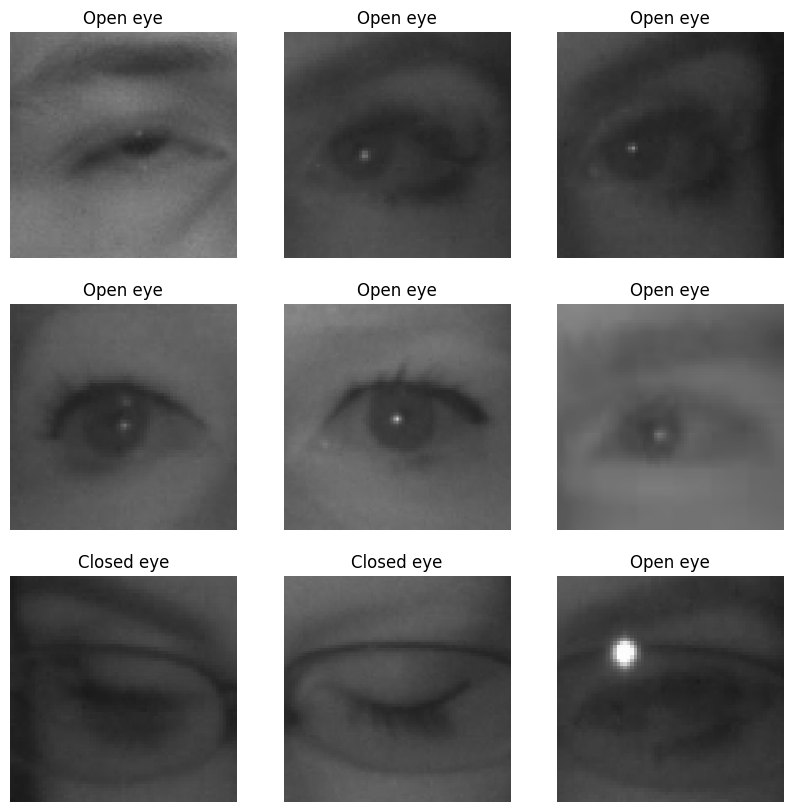

In [ ]:
# Visualizing the data
plt.figure(figsize=(10,10))
for batch in train_data.take(1):
  print(batch[0].shape)
  print(batch[1].shape)
  for i in range(9):
    img = tf.cast(batch[0][i], tf.float32)
    label = batch[1][i]
    plt.subplot(3,3,i+1)
    plt.axis(False)
    plt.imshow(img/255.)
    plt.title("Open eye" if label[0] == 1 else "Closed eye")

## Clipping only the eyes from portrait photos

In [ ]:
! wget https://github.com/nitaymayo/Donut_Blink/raw/master/shape_predictor_68_face_landmarks.dat

--2023-04-02 19:18:56--  https://github.com/nitaymayo/Donut_Blink/raw/master/shape_predictor_68_face_landmarks.dat
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/nitaymayo/Donut_Blink/master/shape_predictor_68_face_landmarks.dat [following]
--2023-04-02 19:18:56--  https://raw.githubusercontent.com/nitaymayo/Donut_Blink/master/shape_predictor_68_face_landmarks.dat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 99693937 (95M) [application/octet-stream]
Saving to: ‘shape_predictor_68_face_landmarks.dat’

shape_predictor_68_ 100%[===================>]  95.08M   362MB/s    in 0.3s    

2023-04

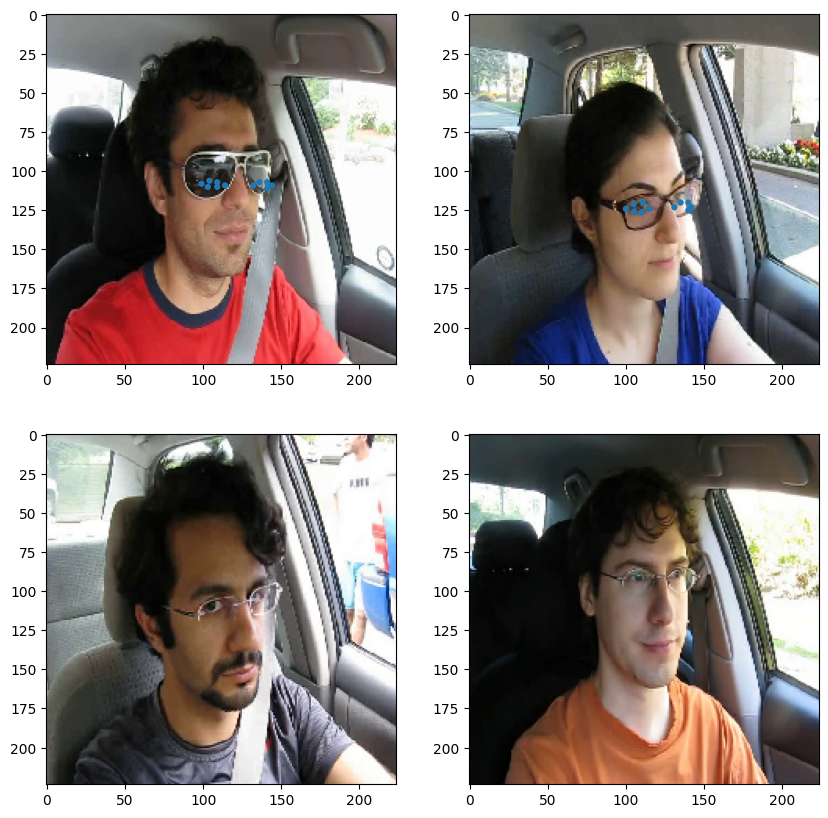

In [ ]:
# Detecting the eyes position

# Face detector
hog_face_detector = dlib.get_frontal_face_detector()

# Eye detector
dlib_facelandmark = dlib.shape_predictor("/content/shape_predictor_68_face_landmarks.dat")

# Checking the detections and plotting the results
for face_imgs in faces_dataset.take(1):
  plt.figure(figsize=(10,10))
  for i in range(4):
    img =  np.asarray(random.choice(face_imgs))

    plt.subplot(2,2,i+1)
    plt.imshow(img)

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    faces = hog_face_detector(img)
    for face in faces:
      face_landmarks = dlib_facelandmark(gray, face)

      for n in range(36, 47):
        x = face_landmarks.part(n).x
        y = face_landmarks.part(n).y
        plt.subplot(2,2,i+1).add_patch(Circle((x,y), 2))



In [ ]:
#Clipping the eyes from the pictures
y_factor = 18
x_factor = 15

def eye_box(img, left_point, right_point):
  """
    Function to get the coordinates for the box around the eye
    Args:
    img: img of the full face
    left_point: the left corner coordinates of the eye in the img
    right point: the right corner coordinates of the eye in the img

    Returns:
    tuple as so:
    in index 0: tuple -> (the lower left corner coordinates of th box, the upper right corner coordinates of the box)
    in index 1: img of the eye cropped as the box dims
  """
  corner_l_l = (left_point.x-x_factor, left_point.y+y_factor)

  corner_u_r = (right_point.x+x_factor, right_point.y-y_factor)

  X_axis_coordinates = (corner_l_l[0], corner_u_r[0])
  Y_axis_coordinates = (corner_l_l[1], corner_u_r[1])

  return ((corner_l_l, corner_u_r), img[tf.math.reduce_min(Y_axis_coordinates):tf.math.reduce_max(Y_axis_coordinates), tf.math.reduce_min(X_axis_coordinates):tf.math.reduce_max(X_axis_coordinates)])

In [ ]:
def get_eyes_imgs(img):
  """
    Function to get all the eyes in a given image
    The function gets the eye coordinate using the 
    dlib facelandmark detector and crops the eye img 
    with the above function 'eye_box()'

    Args:
    img: image in array form

    Returns:
    Array with dictioneries as so: {'img':contains cropped eye img, 'coordinates': tuple with the (lower left, upper right) points of the box}
  """
  img = np.asarray(img)
  eyes = []
  #Getting eyes position

  faces = hog_face_detector(img)

  if not faces:
    return False

  for face in faces:
    face_landmarks = dlib_facelandmark(img, face)

    left_coordinate, left_eye = eye_box(img, face_landmarks.part(36), face_landmarks.part(39))

    right_coordinate, right_eye = eye_box(img, face_landmarks.part(42), face_landmarks.part(45))

    left_eye = cv2.resize(left_eye, IMG_SIZE)
    right_eye = cv2.resize(right_eye, IMG_SIZE)

    eyes.append({"img": left_eye,
                 "coordinates": left_coordinate})
    eyes.append({"img": right_eye,
                "coordinates": right_coordinate})

  return eyes

In [ ]:
def clip_eyes_and_print():
  for face_imgs in faces_dataset.take(1):
    img = np.asarray(random.choice(face_imgs))
    #Getting eyes position
    eyes = get_eyes_imgs(img)

    if not eyes:
      clip_eyes_and_print()
    else:
      plt.figure()
      plt.subplot(1,3,1)
      plt.title("Full Img")
      plt.imshow(img)

      plt.subplot(1,3,2)
      plt.title("Cliped left eye")
      plt.imshow(eyes[0]["img"])

      plt.subplot(1,3,3)
      plt.title("Cliped right eye")
      plt.imshow(eyes[1]["img"])
      

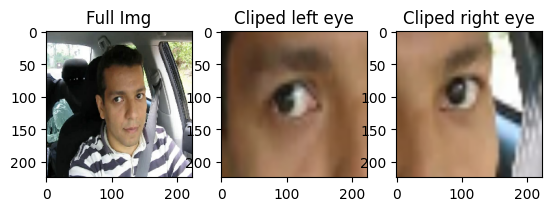

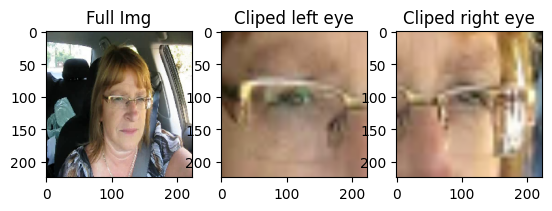

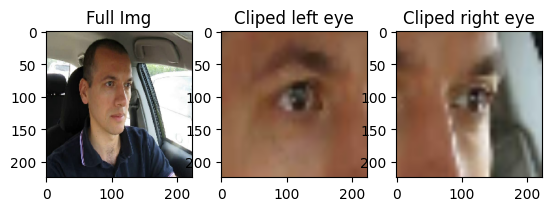

In [ ]:
for i in range(3):
  clip_eyes_and_print()

## Building the models for detecting eye's state

The model that will be experimented:

  1. Basemodel - 2 fully connceted layers
  2. Simple CNN
  3. Complicated CNN - 2 times more layers as the second model
  4. CNN Combined with fully connected layers and GlobalAVGPooling
  5. Feature extraction using EfficientNetB0
  6. Same as 5 with augmentation

In [ ]:
def compile_train_evaluate_model(model, train_data=train_data_5_percent, lr=0.01, verbose=1, epochs=5, callbacks=[]):
  # Compile
  model.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                metrics=["accuracy"])
  # Fit
  print("Trainig model:" + model.name)
  history = model.fit(train_data,
                      epochs=epochs,
                      verbose=verbose,
                      validation_data=test_data,
                      validation_steps=int(0.10 * len(test_data)),
                      callbacks=callbacks)
  
  evaluation = model.evaluate(test_data)

  print("-"*40, "\n\n\n")
  return history, evaluation

In [ ]:
### Model 1, Baseline
model_1 = tf.keras.Sequential([
    layers.Input(shape=IMG_SIZE+(3,)),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
], name="baseline")

In [ ]:
### Model 2, Simple CNN
model_2 = tf.keras.Sequential([
    layers.Input(shape=IMG_SIZE+(3,)),
    layers.Rescaling(1/255.),
    layers.Conv2D(64, kernel_size=(5,5), strides=1, padding="same", activation="relu"),
    layers.Flatten(),
    layers.Dense(1, activation="sigmoid")
], name="Simple_CNN")

In [ ]:
### Model 3, more complicated CNN
model_3 = tf.keras.Sequential([
    layers.Input(shape=IMG_SIZE+(3,)),
    layers.Rescaling(1/255.),
    layers.Conv2D(64, kernel_size=(5,5), strides=1, padding="same", activation="relu"),
    layers.Conv2D(32, kernel_size=(5,5), strides=1, padding="same", activation="relu"),
    layers.Flatten(),
    layers.Dense(1, activation="sigmoid")
], name="Complicated_CNN")

In [ ]:
### Model 4, Combined CNN and Fully-connected and GlobalAvg
model_4 = tf.keras.Sequential([
    layers.Input(shape=IMG_SIZE+(3,)),
    layers.Rescaling(1/255.),
    layers.Conv2D(64, kernel_size=(5,5), strides=1, padding="same", activation="relu"),
    layers.Conv2D(32, kernel_size=(5,5), strides=1, padding="same", activation="relu"),
    layers.GlobalAveragePooling2D(),
    layers.Dense(32, activation="sigmoid"),
    layers.Dense(1, activation="sigmoid")
], name="Combined_models")

In [ ]:
### Model 5, Feature extraction with EfficientNetB0
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

base_model.trainable = False

inputs = tf.keras.Input(shape=IMG_SIZE+(3,))

x = base_model(inputs)

x = layers.GlobalAveragePooling2D()(x)

x = layers.Dense(32, activation="relu")(x)

outputs = layers.Dense(1, activation="sigmoid")(x)

model_5 = tf.keras.Model(inputs, outputs, name="Feature_extraction")


16705208/16705208 [==============================] - 2s 0us/step


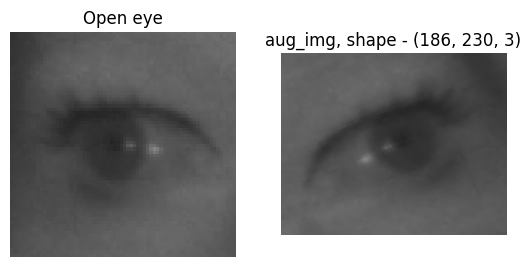

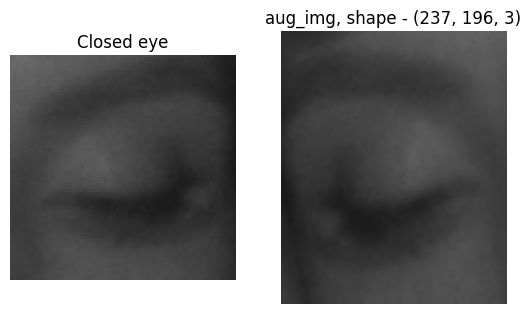

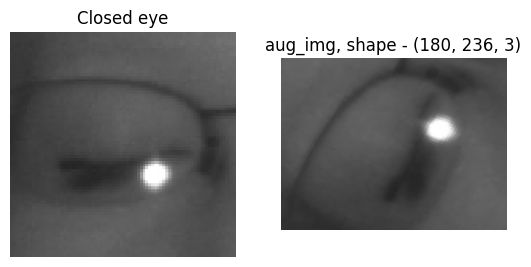

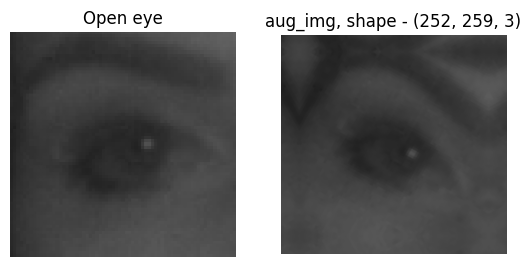

In [ ]:
# Build and Visualize the augmentation layer

augmentation_layer = tf.keras.Sequential([
    layers.RandomRotation(0.2),
    layers.RandomFlip("horizontal"),
    layers.RandomWidth(0.2),
    layers.RandomHeight(0.2),
    layers.RandomZoom(0.2),
], name="data_augmentation")

for eyes, labels in train_data.take(1):
  for i in range(4):
    img = tf.cast(eyes[i], tf.float32)
    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(img/255.)
    plt.title("Open eye" if labels[i][0] == 1 else "Closed eye")
    plt.axis(False)

    aug_img = tf.squeeze(augmentation_layer(tf.expand_dims(img, axis=0), training=True))
    plt.subplot(1,2,2)
    plt.imshow(aug_img/255.)
    plt.title(f"aug_img, shape - {aug_img.shape}")
    plt.axis(False)

In [ ]:
### Model 6, Feature extraction with EfficientNetB0

base_model = tf.keras.applications.EfficientNetB0(include_top=False)

base_model.trainable = False

inputs = tf.keras.Input(shape=IMG_SIZE+(3,))

x = augmentation_layer(inputs, training=True)

x = base_model(x)

x = layers.GlobalAveragePooling2D()(x)

x = layers.Dense(32, activation="relu")(x)

outputs = layers.Dense(1, activation="sigmoid")(x)

model_6 = tf.keras.Model(inputs, outputs, name="Feature_extraction_augmentation")

In [ ]:
# Gethering the models in array

models = [model_1, model_2, model_3, model_4, model_5, model_6]

In [ ]:
# Print models summary
for model in models:
  model.summary()

Model: "baseline"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 dense (Dense)               (None, 64)                9633856   
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9,633,921
Trainable params: 9,633,921
Non-trainable params: 0
_________________________________________________________________
Model: "Simple_CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)            

In [ ]:
# fit the models and add the results to a pandas DF
results = pd.DataFrame()
results.index = ["loss", "acc", "pred_time"]
histories = []
checkpoints_path = "models_chekpoints"
for model in models:
  checkpoint = tf.keras.callbacks.ModelCheckpoint(os.path.join(checkpoints_path, model.name),
                                                  monitor='val_loss',
                                                  save_best_only=True)
  
  history, evaluation = compile_train_evaluate_model(model, callbacks=[checkpoint])


  histories.append(history)

  # adding prediction time to the evaluation metrics
  time_sum = 0
  for batch, labels in test_data.take(1):
    for sample in batch:
      start = time.time()
      model.predict(tf.expand_dims(sample, axis=0), verbose=0)
      end = time.time()
      time_sum = time_sum + end - start
    time_avg = time_sum / len(batch)

  evaluation.append(time_avg)

  results[model.name] = evaluation

Trainig model:baseline
Epoch 1/5
31/31 [==============================] - 12s 230ms/step - loss: 26179.0195 - accuracy: 0.4718 - val_loss: 0.6929 - val_accuracy: 0.5312
Epoch 2/5
31/31 [==============================] - 3s 102ms/step - loss: 0.6932 - accuracy: 0.4990 - val_loss: 0.6926 - val_accuracy: 0.5339
Epoch 3/5
31/31 [==============================] - 4s 107ms/step - loss: 0.6933 - accuracy: 0.4990 - val_loss: 0.6931 - val_accuracy: 0.5234
Epoch 4/5
31/31 [==============================] - 4s 126ms/step - loss: 0.6932 - accuracy: 0.4960 - val_loss: 0.6935 - val_accuracy: 0.4948
Epoch 5/5
125/125 [==============================] - 5s 41ms/step - loss: 0.6932 - accuracy: 0.5000
---------------------------------------- 



Trainig model:Simple_CNN
Epoch 1/5
31/31 [==============================] - ETA: 0s - loss: 59.8919 - accuracy: 0.4990

31/31 [==============================] - 10s 112ms/step - loss: 59.8919 - accuracy: 0.4990 - val_loss: 0.6928 - val_accuracy: 0.5182
Epoch 2/5
31/31 [==============================] - 4s 103ms/step - loss: 0.6934 - accuracy: 0.4960 - val_loss: 0.6931 - val_accuracy: 0.5052
Epoch 3/5
31/31 [==============================] - 6s 166ms/step - loss: 0.6933 - accuracy: 0.4909 - val_loss: 0.6931 - val_accuracy: 0.5286
Epoch 4/5
31/31 [==============================] - 3s 92ms/step - loss: 0.6930 - accuracy: 0.5101 - val_loss: 0.6940 - val_accuracy: 0.4766
Epoch 5/5
125/125 [==============================] - 9s 67ms/step - loss: 0.6932 - accuracy: 0.5000
---------------------------------------- 



Trainig model:Complicated_CNN
Epoch 1/5
31/31 [==============================] - ETA: 0s - loss: 119.7804 - accuracy: 0.4990

31/31 [==============================] - 9s 225ms/step - loss: 119.7804 - accuracy: 0.4990 - val_loss: 0.6931 - val_accuracy: 0.5052
Epoch 2/5
31/31 [==============================] - 5s 154ms/step - loss: 0.6932 - accuracy: 0.4919 - val_loss: 0.6932 - val_accuracy: 0.4792
Epoch 3/5
31/31 [==============================] - 5s 153ms/step - loss: 0.6933 - accuracy: 0.5040 - val_loss: 0.6932 - val_accuracy: 0.4922
Epoch 4/5
31/31 [==============================] - 6s 181ms/step - loss: 0.6932 - accuracy: 0.5010 - val_loss: 0.6933 - val_accuracy: 0.4792
Epoch 5/5
125/125 [==============================] - 8s 57ms/step - loss: 0.6932 - accuracy: 0.5000
---------------------------------------- 



Trainig model:Combined_models
Epoch 1/5
31/31 [==============================] - ETA: 0s - loss: 0.7062 - accuracy: 0.4970

31/31 [==============================] - 6s 179ms/step - loss: 0.7062 - accuracy: 0.4970 - val_loss: 0.7028 - val_accuracy: 0.4714
Epoch 2/5
31/31 [==============================] - ETA: 0s - loss: 0.6893 - accuracy: 0.5151

31/31 [==============================] - 6s 179ms/step - loss: 0.6893 - accuracy: 0.5151 - val_loss: 0.6853 - val_accuracy: 0.5417
Epoch 3/5
31/31 [==============================] - 6s 184ms/step - loss: 0.6816 - accuracy: 0.5665 - val_loss: 0.7349 - val_accuracy: 0.4766
Epoch 4/5
31/31 [==============================] - 5s 156ms/step - loss: 0.6969 - accuracy: 0.5333 - val_loss: 0.6909 - val_accuracy: 0.5339
Epoch 5/5
31/31 [==============================] - ETA: 0s - loss: 0.6647 - accuracy: 0.5474

125/125 [==============================] - 7s 50ms/step - loss: 0.6732 - accuracy: 0.5487
---------------------------------------- 



Trainig model:Feature_extraction
Epoch 1/5
31/31 [==============================] - ETA: 0s - loss: 0.3624 - accuracy: 0.8357

31/31 [==============================] - 52s 1s/step - loss: 0.3624 - accuracy: 0.8357 - val_loss: 0.2279 - val_accuracy: 0.9062
Epoch 2/5
31/31 [==============================] - ETA: 0s - loss: 0.1720 - accuracy: 0.9304

31/31 [==============================] - 44s 1s/step - loss: 0.1720 - accuracy: 0.9304 - val_loss: 0.1885 - val_accuracy: 0.9219
Epoch 3/5
31/31 [==============================] - 5s 136ms/step - loss: 0.1197 - accuracy: 0.9556 - val_loss: 0.1920 - val_accuracy: 0.9245
Epoch 4/5
31/31 [==============================] - ETA: 0s - loss: 0.1167 - accuracy: 0.9506

31/31 [==============================] - 44s 1s/step - loss: 0.1167 - accuracy: 0.9506 - val_loss: 0.1250 - val_accuracy: 0.9479
Epoch 5/5
31/31 [==============================] - ETA: 0s - loss: 0.0988 - accuracy: 0.9637

125/125 [==============================] - 8s 61ms/step - loss: 0.1152 - accuracy: 0.9615
---------------------------------------- 



Trainig model:Feature_extraction_augmentation
Epoch 1/5
31/31 [==============================] - ETA: 0s - loss: 0.3695 - accuracy: 0.8367

31/31 [==============================] - 78s 2s/step - loss: 0.3695 - accuracy: 0.8367 - val_loss: 0.2504 - val_accuracy: 0.8828
Epoch 2/5
31/31 [==============================] - ETA: 0s - loss: 0.2124 - accuracy: 0.9234

31/31 [==============================] - 58s 2s/step - loss: 0.2124 - accuracy: 0.9234 - val_loss: 0.2355 - val_accuracy: 0.9115
Epoch 3/5
31/31 [==============================] - ETA: 0s - loss: 0.1941 - accuracy: 0.9264

31/31 [==============================] - 68s 2s/step - loss: 0.1941 - accuracy: 0.9264 - val_loss: 0.2296 - val_accuracy: 0.9036
Epoch 4/5
31/31 [==============================] - ETA: 0s - loss: 0.1768 - accuracy: 0.9325

31/31 [==============================] - 65s 2s/step - loss: 0.1768 - accuracy: 0.9325 - val_loss: 0.1754 - val_accuracy: 0.9271
Epoch 5/5
31/31 [==============================] - ETA: 0s - loss: 0.1722 - accuracy: 0.9335

125/125 [==============================] - 31s 243ms/step - loss: 0.1736 - accuracy: 0.9377
---------------------------------------- 





In [ ]:
results

,baseline,Simple_CNN,Complicated_CNN,Combined_models,Feature_extraction,Feature_extraction_augmentation
loss,0.693219,0.693228,0.693155,0.673196,0.115228,0.173575
acc,0.500000,0.500000,0.500000,0.548750,0.961500,0.937750
pred_time,0.041731,0.040066,0.062668,0.057538,0.140398,0.312339


<Axes: >

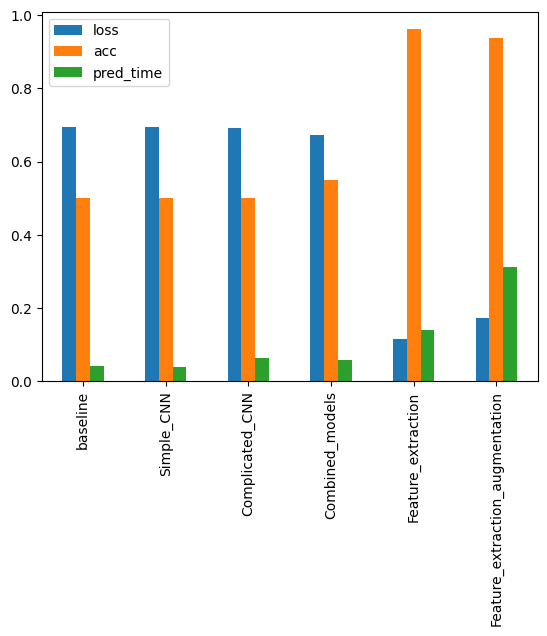

In [ ]:
# Plot results
results.transpose().plot(kind="bar")

### Builing the final model and fitting

training the fifth-model, feature extraction model with efficienetB0, on all of the data

this model was selected because of high accuracy while having efficient prediction time



In [ ]:
### Final model, Feature extraction with EfficientNetB0

base_model = tf.keras.applications.EfficientNetB0(include_top=False)

base_model.trainable = False

inputs = tf.keras.Input(shape=IMG_SIZE+(3,))

x = base_model(inputs)

x = layers.GlobalAveragePooling2D()(x)

x = layers.Dense(32, activation="relu")(x)

outputs = layers.Dense(1, activation="sigmoid")(x)

final_model = tf.keras.Model(inputs, outputs, name="Final_model")

In [ ]:
final_model.summary()

Model: "Final_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d_3   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_10 (Dense)            (None, 32)                40992     
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 4,090,596
Trainable params: 41,025
Non-trainable params: 4,049,571
________________________________________

In [ ]:
# Creating a faster data pipeline
train_data = train_data.prefetch(tf.data.AUTOTUNE).cache()

In [ ]:
train_data

<CacheDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>

In [ ]:
# Train the model on the full data set

earlystopping_callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=2, restore_best_weights=True)
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint("final_model_checkpoints")

final_model.compile(loss="binary_crossentropy",
                    optimizer="Adam",
                    metrics=["accuracy"])

final_history = final_model.fit(train_data,
                        epochs=6,
                        validation_data=test_data,
                        validation_steps=int(0.15 * len(test_data)),
                        callbacks=[earlystopping_callback, checkpoint_callback])

Epoch 1/6
625/625 [==============================] - ETA: 0s - loss: 0.1193 - accuracy: 0.9564

625/625 [==============================] - 106s 156ms/step - loss: 0.1193 - accuracy: 0.9564 - val_loss: 0.0795 - val_accuracy: 0.9722
Epoch 2/6
625/625 [==============================] - ETA: 0s - loss: 0.0727 - accuracy: 0.9737

625/625 [==============================] - 80s 128ms/step - loss: 0.0727 - accuracy: 0.9737 - val_loss: 0.0761 - val_accuracy: 0.9722
Epoch 3/6
625/625 [==============================] - ETA: 0s - loss: 0.0618 - accuracy: 0.9786

625/625 [==============================] - 80s 127ms/step - loss: 0.0618 - accuracy: 0.9786 - val_loss: 0.0541 - val_accuracy: 0.9809
Epoch 4/6
625/625 [==============================] - ETA: 0s - loss: 0.0527 - accuracy: 0.9806

625/625 [==============================] - 80s 128ms/step - loss: 0.0527 - accuracy: 0.9806 - val_loss: 0.0473 - val_accuracy: 0.9878
Epoch 5/6
625/625 [==============================] - ETA: 0s - loss: 0.0503 - accuracy: 0.9815

625/625 [==============================] - 79s 127ms/step - loss: 0.0503 - accuracy: 0.9815 - val_loss: 0.0394 - val_accuracy: 0.9878
Epoch 6/6
625/625 [==============================] - ETA: 0s - loss: 0.0490 - accuracy: 0.9829

625/625 [==============================] - 80s 128ms/step - loss: 0.0490 - accuracy: 0.9829 - val_loss: 0.0521 - val_accuracy: 0.9844


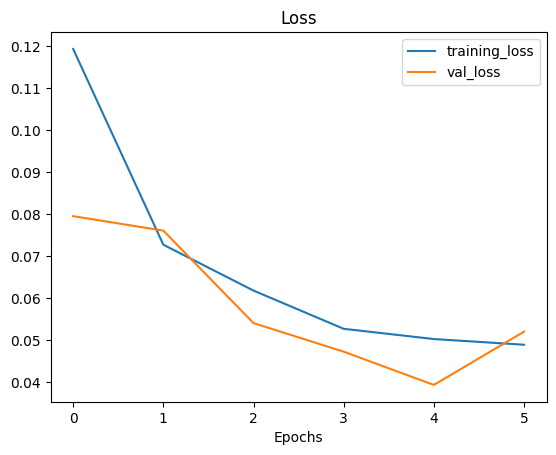

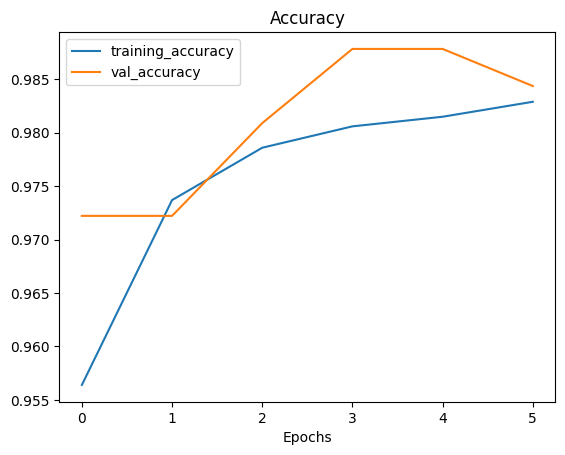

In [ ]:
plot_loss_curves(final_history)

In [ ]:
# saving the model before fine tunning
final_model.save("eye_detector.h5")

In [ ]:
for i, layer in enumerate(final_model.layers):
  print(i, layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

0 input_10 True float32 <Policy "float32">
1 efficientnetb0 False float32 <Policy "float32">
2 global_average_pooling2d_3 True float32 <Policy "float32">
3 dense_10 True float32 <Policy "float32">
4 dense_11 True float32 <Policy "float32">


In [ ]:
# making the last 15 layers of the feature extractor trainable
for layer in final_model.layers[1].layers[-15:]:
  layer.trainable = True

In [ ]:
for i, layer in enumerate(final_model.layers[1].layers):
  print(i, layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

0 input_9 False float32 <Policy "float32">
1 rescaling_5 False float32 <Policy "float32">
2 normalization_2 False float32 <Policy "float32">
3 tf.math.truediv_2 False float32 <Policy "float32">
4 stem_conv_pad False float32 <Policy "float32">
5 stem_conv False float32 <Policy "float32">
6 stem_bn False float32 <Policy "float32">
7 stem_activation False float32 <Policy "float32">
8 block1a_dwconv False float32 <Policy "float32">
9 block1a_bn False float32 <Policy "float32">
10 block1a_activation False float32 <Policy "float32">
11 block1a_se_squeeze False float32 <Policy "float32">
12 block1a_se_reshape False float32 <Policy "float32">
13 block1a_se_reduce False float32 <Policy "float32">
14 block1a_se_expand False float32 <Policy "float32">
15 block1a_se_excite False float32 <Policy "float32">
16 block1a_project_conv False float32 <Policy "float32">
17 block1a_project_bn False float32 <Policy "float32">
18 block2a_expand_conv False float32 <Policy "float32">
19 block2a_expand_bn False 

In [ ]:
# Early stopping callback
earlystopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
# Checkpoint callback
checkpoint_callback_fine_tune = tf.keras.callbacks.ModelCheckpoint('final_model_fine_tunes_checkpoint', save_weights_only=True)

In [ ]:
# Recompiling
final_model.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

In [ ]:
initial_epoch = final_history.epoch[-1]
initial_epoch

5

In [ ]:
# Fine tune the model
fine_tune_epochs = 20

fine_tune_history = final_model.fit(train_data,
                                epochs=fine_tune_epochs,
                                initial_epoch=initial_epoch,
                                validation_data=test_data,
                                validation_steps=int(0.15 * len(test_data)),
                                callbacks=[earlystopping_callback,
                                           checkpoint_callback_fine_tune])

Epoch 6/20
625/625 [==============================] - 47s 66ms/step - loss: 0.0888 - accuracy: 0.9667 - val_loss: 0.0644 - val_accuracy: 0.9774
Epoch 7/20
625/625 [==============================] - 38s 61ms/step - loss: 0.0595 - accuracy: 0.9783 - val_loss: 0.0676 - val_accuracy: 0.9757
Epoch 8/20
625/625 [==============================] - 39s 63ms/step - loss: 0.0499 - accuracy: 0.9816 - val_loss: 0.0677 - val_accuracy: 0.9740
Epoch 9/20
625/625 [==============================] - 38s 61ms/step - loss: 0.0405 - accuracy: 0.9846 - val_loss: 0.0635 - val_accuracy: 0.9809
Epoch 10/20
625/625 [==============================] - 39s 62ms/step - loss: 0.0368 - accuracy: 0.9872 - val_loss: 0.0537 - val_accuracy: 0.9826
Epoch 11/20
625/625 [==============================] - 38s 61ms/step - loss: 0.0340 - accuracy: 0.9879 - val_loss: 0.0453 - val_accuracy: 0.9878
Epoch 12/20
625/625 [==============================] - 39s 62ms/step - loss: 0.0306 - accuracy: 0.9888 - val_loss: 0.0529 - val_accura

In [ ]:
# saving the model after fine tunning
final_model.save("eye_state_detector_fine_tuned.h5")

1/1 [==============================] - 2s 2s/step


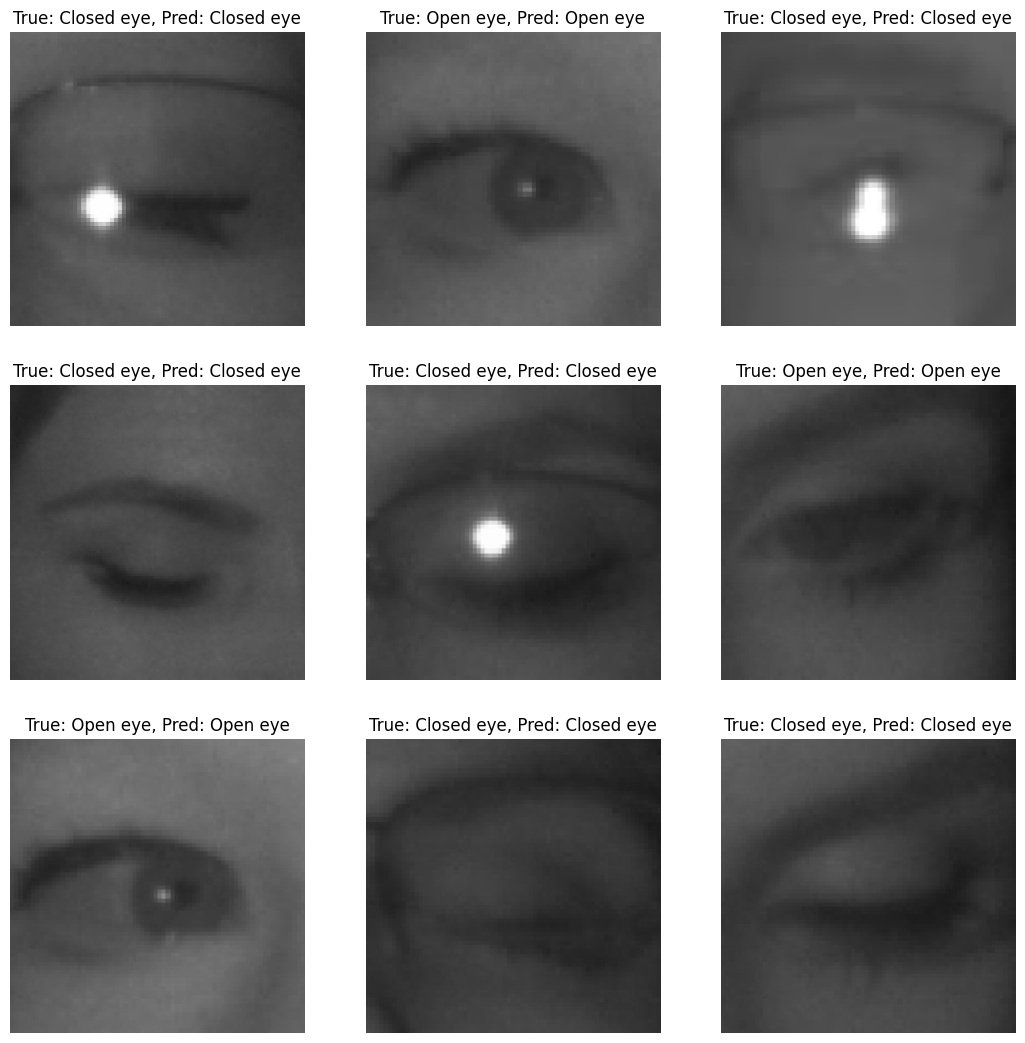

In [ ]:
# Visualizing the predictions

plt.figure(figsize=(13,13))
for eyes, labels in test_data.take(1):
  preds = final_model.predict(tf.cast(eyes, tf.float32))
  for i in range(9):
    plt.subplot(3,3,i+1)
    img = tf.cast(eyes[i], tf.float32)
    label = "Open eye" if labels[i][0] == 1 else "Closed eye"
    pred = "Open eye" if round(preds[i][0]) == 1 else "Closed eye"
    plt.title(f"True: {label}, Pred: {pred}" )
    plt.axis(False)
    plt.imshow(img/255.)


## Instead of waiting the long trainig time, you can load a pretrained model here


In [ ]:
! wget https://github.com/nitaymayo/Donut_Blink/raw/master/eye_state_detector_fine_tuned.h5

--2023-04-02 19:53:41--  https://github.com/nitaymayo/Donut_Blink/raw/master/eye_state_detector_fine_tuned.h5
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/nitaymayo/Donut_Blink/master/eye_state_detector_fine_tuned.h5 [following]
--2023-04-02 19:53:42--  https://raw.githubusercontent.com/nitaymayo/Donut_Blink/master/eye_state_detector_fine_tuned.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24390504 (23M) [application/octet-stream]
Saving to: ‘eye_state_detector_fine_tuned.h5’

eye_state_detector_ 100%[===================>]  23.26M  --.-KB/s    in 0.05s   

2023-04-02 19:53:44 (443 MB/s

In [ ]:
final_model = tf.keras.models.load_model("eye_state_detector_fine_tuned.h5")

In [ ]:
final_model.evaluate(test_data)

125/125 [==============================] - 11s 70ms/step - loss: 0.4546 - accuracy: 0.9298


[0.4546283781528473, 0.9297500252723694]

## Creating the full detection and clasification algorithm

In [ ]:
def get_eyes_bbox_state(img, model):
  """
    Args:
    img: to predict on
    model: to make the predictions

    Returns:
    array with dictioneries {'coordinates': eye box coordinates, 
                             'state': 0 for closed eye and 1 for open one}
  """
  # Seperate the img to 2 eyes img
  eyes = get_eyes_imgs(img)
  if not eyes:
      return False
  res = []
  eyes_imgs = np.asarray([eye["img"] for eye in eyes])
  preds = tf.squeeze(np.round(model.predict(eyes_imgs, verbose=0)))
  for i, eye in enumerate(eyes):
    # Getting eye state
    eye_state = {"coordinates": eye["coordinates"]}
    state = np.round(model.predict(tf.expand_dims(eye["img"], axis=0), verbose=0)[0])

    eye_state["state"] = preds[i]

    res.append(eye_state)    

  return res

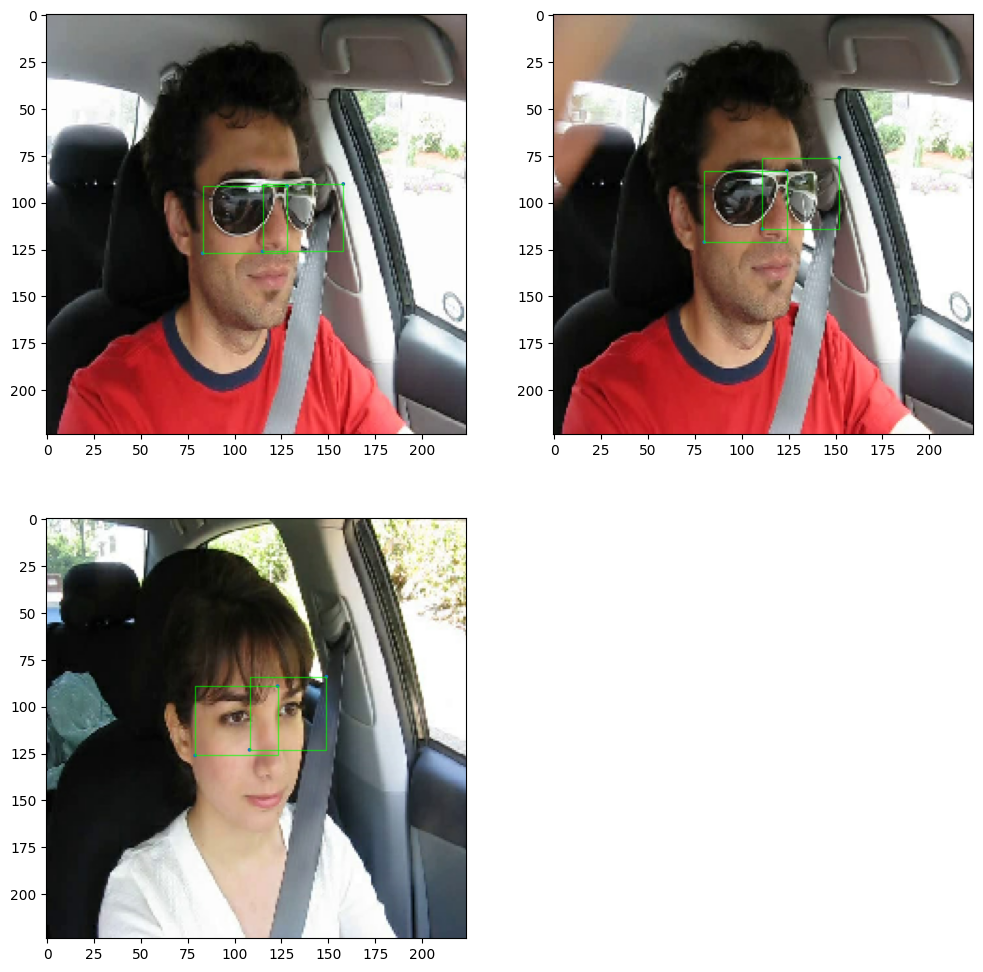

In [ ]:
# Check the function
plt.figure(figsize=(12,12))
for face_imgs in faces_dataset.take(1): 
  for i in range(4):
    img = face_imgs[i]
    eyes = get_eyes_bbox_state(img, model_4)
    if not eyes:
      continue
    plt.subplot(2,2,i+1)
    plt.imshow(img)
    for eye in eyes:
      rect_dims = np.abs(np.subtract(eye["coordinates"][0], eye["coordinates"][1]))

      circ1 = patches.Circle(eye["coordinates"][0], 1)
      circ2 = patches.Circle(eye["coordinates"][1], 1)

      plt.subplot(2,2,i+1).add_patch(circ1)
      plt.subplot(2,2,i+1).add_patch(circ2)

      patch = patches.Rectangle(eye["coordinates"][0], rect_dims[0], -rect_dims[1])
      patch.set_color("#ff000099" if eye["state"]==0 else "#00ff0099")
      patch.set_fill(False)
      plt.subplot(2,2,i+1).add_patch(patch)
    

## Java script configuration for playing video using the web-cam

In [ ]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [ ]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

## Start the video stream

In [ ]:
# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0 
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # get face region coordinates
    eyes = get_eyes_bbox_state(img, final_model)
    if eyes: 
      # get face bounding box for overlay
      for eye in eyes:
        color = (255,0,0) if eye["state"] == 0 else (0,255,0)

        bbox_array = cv2.rectangle(bbox_array,eye["coordinates"][0],eye["coordinates"][1],color,2)

      bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
      # convert overlay of bbox into bytes
      bbox_bytes = bbox_to_bytes(bbox_array)
      # update bbox so next frame gets new overlay
      bbox = bbox_bytes

<IPython.core.display.Javascript object>